In [3]:
import numpy as np
import pandas as pd
import statistics as st

df = pd.read_csv('SuperStore_Orders.csv', sep = ",", encoding="ISO-8859-1")
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,02-01-2011,06-01-2011,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,03-01-2011,03-01-2011,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,03-01-2011,09-01-2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,03-01-2011,07-01-2011,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.0,253.320,81.26,High,2011


In [4]:
df['sales'] = df['sales'].replace(r'[^0-9.\-]', '', regex=True)

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

## ANALISIS STATISTIK DASAR ##

In [5]:
# --- Pilih kolom numerik ---
num_cols = ["sales", "quantity", "discount", "profit", "shipping_cost"]

In [6]:
# --- Hitung statistik dasar ---
for col in num_cols:
    print(f"\nStatistik untuk kolom: {col}")
    print(f"Mean          : {df[col].mean():.2f}")
    print(f"Median        : {df[col].median():.2f}")
    print(f"Modus         : {df[col].mode().values}")
    print(f"Variance      : {df[col].var():.2f}")
    print(f"Std Deviation : {df[col].std():.2f}")


Statistik untuk kolom: sales
Mean          : 246.50
Median        : 85.00
Modus         : [13]
Variance      : 237721.75
Std Deviation : 487.57

Statistik untuk kolom: quantity
Mean          : 3.48
Median        : 3.00
Modus         : [2]
Variance      : 5.19
Std Deviation : 2.28

Statistik untuk kolom: discount
Mean          : 0.14
Median        : 0.00
Modus         : [0.]
Variance      : 0.05
Std Deviation : 0.21

Statistik untuk kolom: profit
Mean          : 28.64
Median        : 9.24
Modus         : [0.]
Variance      : 30423.77
Std Deviation : 174.42

Statistik untuk kolom: shipping_cost
Mean          : 26.38
Median        : 7.79
Modus         : [0.86]
Variance      : 3282.92
Std Deviation : 57.30


## MENCARI PENCILAN DAN VISUALISASI ##

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


Outliers di kolom sales:
       sales
8        912
9        667
12       854
27      1648
43      3029
...      ...
51229   1091
51230    866
51231   1049
51232    867
51239    685

[5655 rows x 1 columns]
lower bound: -299.0
upper bound: 581.0


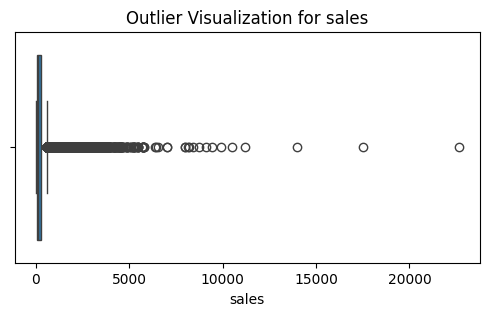


Outliers di kolom quantity:
       quantity
126          10
180          11
183          12
185          12
213          11
...         ...
51043        10
51045        12
51149        10
51161        14
51258        12

[877 rows x 1 columns]
lower bound: -2.5
upper bound: 9.5


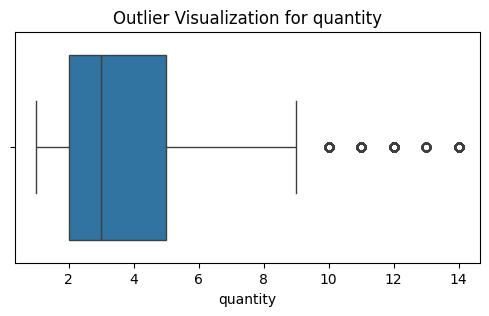


Outliers di kolom discount:
       discount
11         0.55
33         0.60
49         0.80
85         0.60
87         0.60
...         ...
51225      0.70
51226      0.70
51231      0.57
51249      0.60
51274      0.60

[4172 rows x 1 columns]
lower bound: -0.30000000000000004
upper bound: 0.5


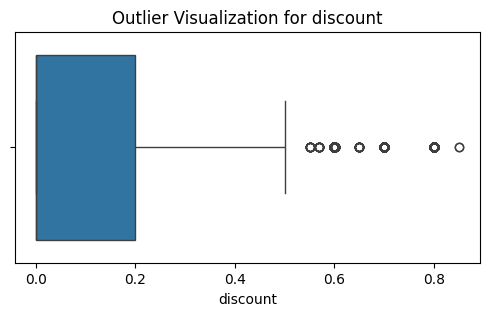


Outliers di kolom profit:
         profit
0      106.1400
7      110.4120
8     -319.4640
9      253.3200
10    -122.8005
...         ...
51239  -63.2340
51245  105.0000
51249 -117.3600
51252  166.4400
51269  153.0900

[9755 rows x 1 columns]
lower bound: -55.215
upper bound: 92.025


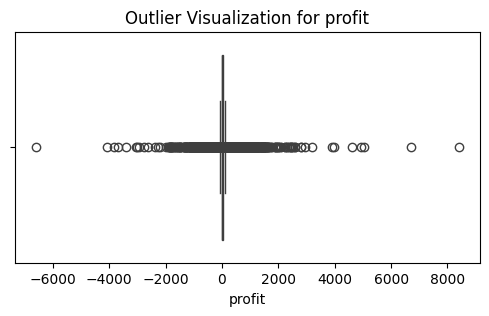


Outliers di kolom shipping_cost:
       shipping_cost
7             125.32
8             107.10
9              81.26
27            109.13
43            191.20
...              ...
51158          57.25
51228         253.25
51229         243.11
51230         138.18
51231          86.86

[5909 rows x 1 columns]
lower bound: -30.15
upper bound: 57.209999999999994


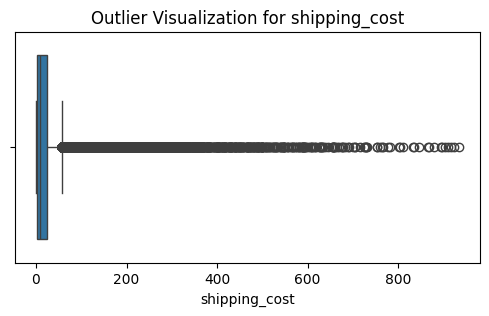

In [8]:
# --- Deteksi outliers menggunakan IQR ---
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nOutliers di kolom {col}:")
    print(outliers[[col]])
    print(f"lower bound: {lower_bound}")
    print(f"upper bound: {upper_bound}")

    # --- Visualisasi boxplot ---
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Visualization for {col}")
    plt.show()

## ANALISIS QUANTITY PER CATEGORY DAN SUB_CATEGORY ##

In [9]:
# Statistik dasar per Category
stats_category = df.groupby("category")["quantity"].describe()
print("Statistik Dasar per Category")
print(stats_category)

# Statistik dasar per Sub Category
stats_subcat = df.groupby("sub_category")["quantity"].describe()
print("\nStatistik Dasar per Sub Category")
print(stats_subcat)

Statistik Dasar per Category
                   count      mean       std  min  25%  50%  75%   max
category                                                              
Furniture         9876.0  3.539287  2.260945  1.0  2.0  3.0  5.0  14.0
Office Supplies  31273.0  3.459278  2.288316  1.0  2.0  3.0  5.0  14.0
Technology       10141.0  3.468691  2.265671  1.0  2.0  3.0  5.0  14.0



Statistik Dasar per Sub Category
               count      mean       std  min  25%  50%  75%   max
sub_category                                                      
Accessories   3075.0  3.559675  2.331909  1.0  2.0  3.0  5.0  14.0
Appliances    1755.0  3.463248  2.242227  1.0  2.0  3.0  5.0  14.0
Art           4883.0  3.338317  2.289705  1.0  2.0  3.0  4.0  14.0
Binders       6152.0  3.483257  2.324240  1.0  2.0  3.0  5.0  14.0
Bookcases     2411.0  3.446703  2.181581  1.0  2.0  3.0  5.0  14.0
Chairs        3434.0  3.592312  2.298649  1.0  2.0  3.0  5.0  14.0
Copiers       2223.0  3.353126  2.156125  1.0  2.0  3.0  4.0  14.0
Envelopes     2435.0  3.441478  2.247834  1.0  2.0  3.0  5.0  14.0
Fasteners     2420.0  3.466942  2.247993  1.0  2.0  3.0  5.0  14.0
Furnishings   3170.0  3.541009  2.280791  1.0  2.0  3.0  5.0  14.0
Labels        2606.0  3.577130  2.343120  1.0  2.0  3.0  5.0  14.0
Machines      1486.0  3.301480  2.251066  1.0  2.0  3.0  4.0  14.0
Paper         3538.0  3.6240

In [11]:
# Sum statistik dasar per Category
sum_category = df.groupby("category")[["quantity"]].sum()
print("Sum per Category")
print(sum_category)

# Sum statistik dasar per Sub Category
sum_subcat = df.groupby("sub_category")[["quantity"]].sum()
print("\nSum per Sub Category")
print(sum_subcat)


Sum per Category
                 quantity
category                 
Furniture           34954
Office Supplies    108182
Technology          35176

Sum per Sub Category
              quantity
sub_category          
Accessories      10946
Appliances        6078
Art              16301
Binders          21429
Bookcases         8310
Chairs           12336
Copiers           7454
Envelopes         8380
Fasteners         8390
Furnishings      11225
Labels            9322
Machines          4906
Paper            12822
Phones           11870
Storage          16917
Supplies          8543
Tables            3083


In [18]:
# Grouping tanpa pivot_table
df_filtered = df[(df["quantity"] > 5)]
result = (
    df_filtered.groupby(["sub_category", "segment"])["quantity"]
      .count() 
)

print(result)

sub_category  segment    
Accessories   Consumer       287
              Corporate      160
              Home Office     88
Appliances    Consumer       147
              Corporate       87
              Home Office     49
Art           Consumer       417
              Corporate      225
              Home Office    143
Binders       Consumer       540
              Corporate      305
              Home Office    188
Bookcases     Consumer       228
              Corporate      119
              Home Office     55
Chairs        Consumer       313
              Corporate      203
              Home Office    118
Copiers       Consumer       169
              Corporate      100
              Home Office     72
Envelopes     Consumer       206
              Corporate      126
              Home Office     70
Fasteners     Consumer       198
              Corporate      129
              Home Office     76
Furnishings   Consumer       285
              Corporate      175
              Hom